# Classification with Logistic regression and SVM 

**What you will learn today**: You will learn how to implement a classifier. First we will analyze a toy example in which we will use a logistic classifier coded from scratch. Once we understood the logic behind the algorithm we will use the black box Sklearn one for recognizing hand-written digits. You will also implement SVM classifier on a different dataset to get familiar with this important family of algorithm.

# 1) Logistic regression from scratch

Let us generate a synthetic dataset using a multivariate Gaussian distribution

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
num_observations = 500

x1 = np.random.multivariate_normal([0, 0], [[1, .5],[.5, 1]], num_observations) #first [] is for the center of the distribution, second and third [] is for the covariance matrix and control the shape of the distribution
x2 = np.random.multivariate_normal([1, 4], [[1, .8],[.8, 1]], num_observations)

dataset = np.vstack((x1, x2)).astype(np.float32) #this creates a 2n x 2 array with the first n elements as x1 and the next n elements as x2
labels = np.hstack((np.zeros(num_observations),np.ones(num_observations)))  #this creates a 2xn array with the first n elements as 0 and the next n elements as 1, and will be used as the labels for the dataset

#dataset[:5]

Let's plot our data

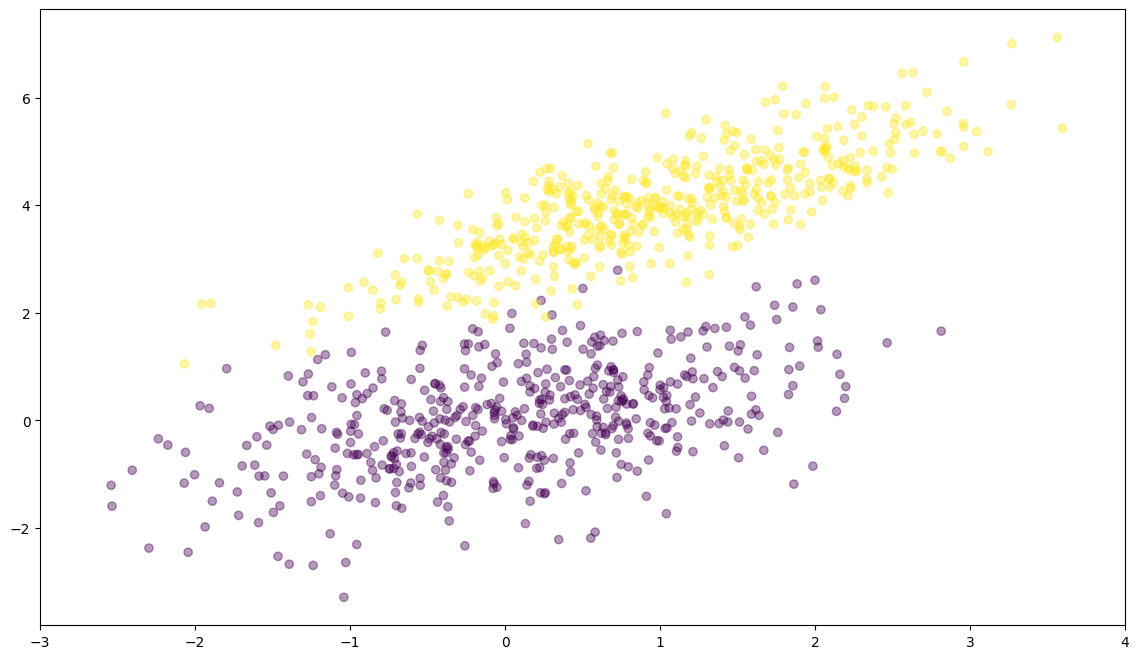

In [4]:
plt.figure(figsize=(14,8))
plt.xlim(-3,4)
plt.scatter(dataset[:, 0], dataset[:, 1],c = labels, alpha = .4)

Our goal is to use a logistic function to fit our dataset. In this case:
$$P_{\rm model}(y_i|{\vec w} \cdot {\vec x_i}) = \frac {e^{({\vec w} \cdot {\vec x_i})y_i}}{1+\exp({\vec w} \cdot {\vec x_i})}$$
such that
$$P_{\rm model}(y_i=1)  = \frac {\exp{({\vec w} \cdot {\vec x_i})}}{1+\exp({\vec w} \cdot {\vec x_i})}  = \frac {1}{1+\exp(-{\vec w} \cdot {\vec x_i})}~~~ \text{and}~~~ P_{\rm model}(y_i=0)  = \frac {1}{1+\exp({\vec w} \cdot {\vec x_i})}  = \frac {\exp{(-{\vec w} \cdot {\vec x_i})}}{1+\exp(-{\vec w} \cdot {\vec x_i})}$$


Now, we can either use the cross-entropy loss and write:
$$\mathcal{L}(\vec{w}) = - \sum_{i=1}^n \sum_{y_i=0,1} y_i \log P_{\rm model}(y_i) +  (1-y_i) \log (1 - P_{\rm model}(y_i)) $$
or equivalently write a maximum-likelihood problem with
$$
\mathcal{L}(\vec{w}|\vec{\bm{x}},\bm{y}) \propto \sum_i \log P_{\rm model}(y_i|{\vec w} \cdot {\vec x_i})
$$
In both cases, the problem boils down to minimizing the following loss:
$$\mathcal{L}(\vec {w}) =  \sum_{i=1}^n - y_i {\vec {w}} \cdot {\vec x}_i  + \log{(1+\exp({\vec w} \cdot {\vec x}_i ))} $$

Let us implement these function:

In [5]:
#this function has the shape of the logistic function, which is an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1
#it is the also the function that is used to model the probability of a binary outcome, in the theory above P_model
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

#We see two types of loss above that in the end boil down to the same thing, the difference between the predicted value and the actual value.
#In the cross-entropy loss, it is easy to understand: if for example we have y=1, contributes when y=1 and penalizes incorrect predictions for the positive class, and vice versa for y=0.
#REMINDER:In logistic regression, a "low" score is a negative value, suggesting a lower probability for the positive class (closer to 0), while a "high" score is positive, indicating a higher probability for the positive class (closer to 1).

def log_loss(features, target, weights):      #logistic loss function
    scores = np.dot(features, weights)
    ll = np.sum( -target*scores + np.log(1 + np.exp(scores)) )    #the first term penalizes incorrect predictions, the second regularizes by ensuring that scores don't diverge unnecessarily.
    return ll

In order to perform optimization, we need to compute the gradient and perform gradient descent. Here we have:

$$\nabla_{\vec w} \mathcal{L}(\vec w) =  \sum_{i = 1}^n - y_i  {\vec x}_i  + {\vec x}_i  \frac{\exp({\vec w} \cdot {\vec x}_i )}{(1+\exp({\vec w} \cdot {\vec x}_i ))} = - \sum_{i = 1}^n {\vec x}_i^T (y_i - P(y_i=1)) $$

We can now write the  logistic regression (This is just the partial derivative of L(w) with respect to  w)

##### **Exercise 1**

##### Try writing Gradient Descent using this Loss, as we did in the previous exercise session

In [6]:
def logistic_regression(features, target, num_steps, learning_rate):
    weights = np.zeros(features.shape[1])  #initialize the weights to zero

    for step in range(num_steps):
        scores = np.dot(features, weights)   #calculate the scores as the dot product of the features and the weights
        predicton = sigmoid(scores)          #calculate the prediction as the sigmoid of the scores, remeber this returns a value between 0 and 1 in occordance to the "S" shape of the sigmoid function!!!
        diff = target - predicton            #calculate the difference between the target and the prediction
        gradient = -np.dot(features.T, diff)         #use the gradient formula shown in the theory above
        weights = weights - learning_rate * gradient    #update the weights

        if step % 10000 == 0:                                                #print the step and the loss every 10000 steps
            print(step, log_loss(features, target, weights))
        
    return weights

We use the usual trick of adding a "1" to the data so that we can actually linear fitting, and call the regression function

In [7]:
intercept = np.ones((dataset.shape[0], 1))     #creates a column vector of ones with the same number of rows as dataset.
data_with_intercept = np.hstack((intercept, dataset))    #adds the column vector of ones to the dataset

We then run the actual GD algorithm

In [8]:
weights = logistic_regression(data_with_intercept, labels, num_steps = 300000, learning_rate = 5e-5)  #run the logistic regression function

0 645.1976320327615
10000 32.751191832359176
20000 27.095065275891347
30000 24.836811224952655
40000 23.593936566289752
50000 22.803112650970398
60000 22.255870323028482
70000 21.855786948699002
80000 21.55169925537929
90000 21.313784058969752
100000 21.123421954281334
110000 20.968362287170734
120000 20.840203784078454
130000 20.732988348642635
140000 20.642371669382296
150000 20.565111368581015
160000 20.498738918089238
170000 20.441342465252287
180000 20.39141903792005
190000 20.347771512096905
200000 20.30943524982975
210000 20.275624876363842
220000 20.245695018470037
230000 20.21911090513166
240000 20.195426054123942
250000 20.174265128187454
260000 20.155310615551997
270000 20.138292375753814
280000 20.12297935729693
290000 20.109172979225384


Now we can plot the prediction from our model, and check how good they are on the training dataset

Accuracy: 0.991


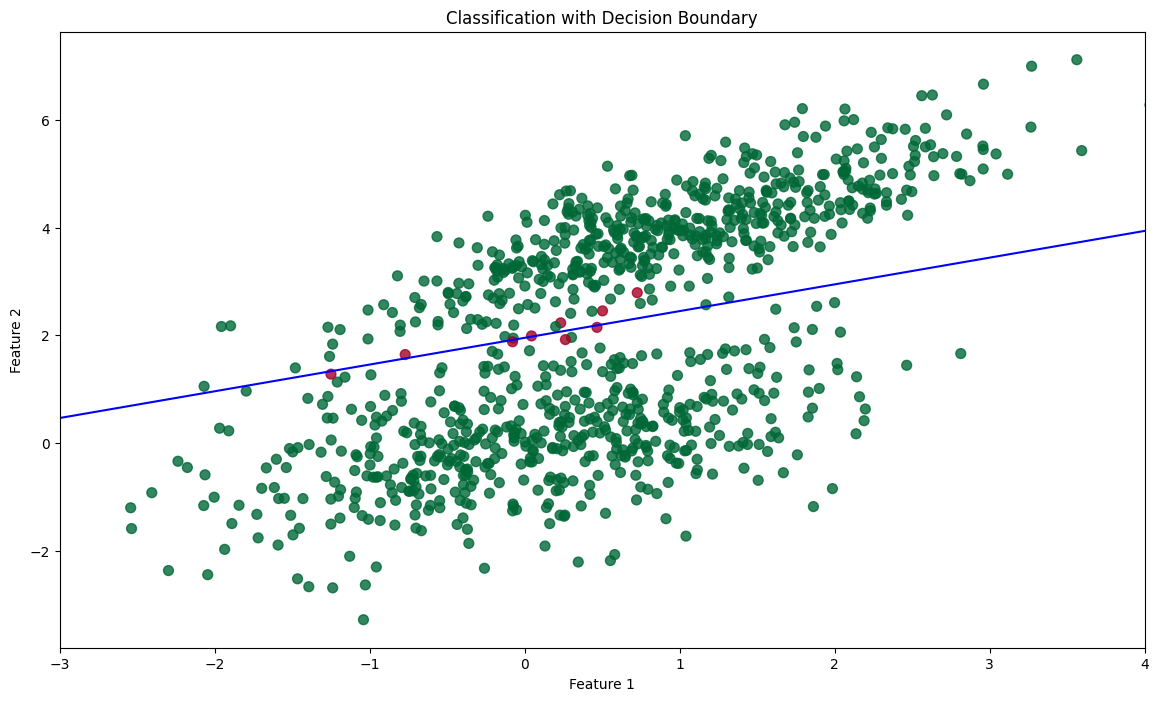

In [9]:
#we calculates a linear decision boundary based on model weights and evaluate the accuracy of the model's pred.

def line(x,a,b,c):
    return -x*b/c-a/c

def myline(x):
    a = weights[0]     #this stems from the column of ones that we added to the dataset and as can be seen a is the intercept.
    b = weights[1]
    c = weights[2]
    return -x*b/c-a/c

final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))                     #applies the sigmoid function to transform scores into probabilities and rounds them to get binary predictions (0 or 1)!

print('Accuracy: {0}'.format((preds == labels).sum().astype(float) / len(preds)))     #counts correct predictions, and dividing by len(preds) gives accuracy as a decimal.

plt.figure(figsize=(14, 8))
plt.scatter(dataset[:, 0], dataset[:, 1],
            c=(preds == labels), cmap="RdYlGn", alpha=0.8, s=50)  #red is wrong, green is right, looks better!
plt.xlim([-3, 4])
plt.plot([-3, 4], [myline(-3), myline(4)], color="blue")  #decision boundary
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Classification with Decision Boundary")
plt.show()


In high dimensional statistics problems, it is often the case that the number of points are of the same order as the dimension. Let us mimick this by using fewer points in dimension 2!

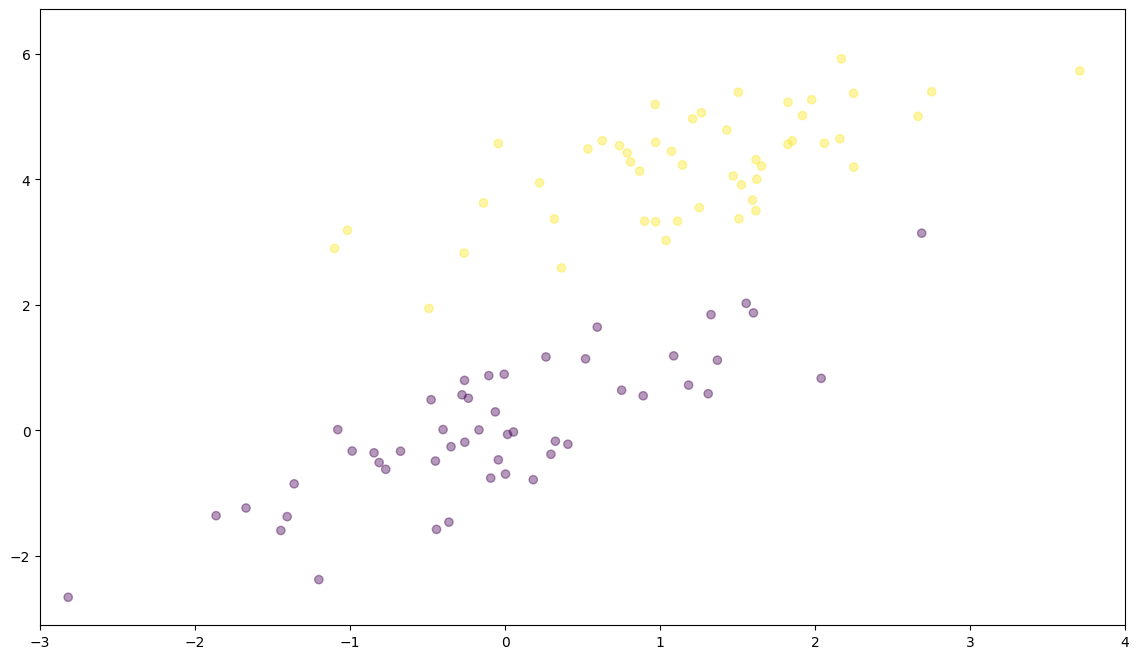

In [10]:
num_observations = 50

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

dataset = np.vstack((x1, x2)).astype(np.float32)
labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))
plt.figure(figsize=(14,8))
plt.xlim([-3,4])
plt.scatter(dataset[:, 0], dataset[:, 1], c = labels, alpha = .4)

Of course, we could just redo our fit

In [11]:
intercept = np.ones((dataset.shape[0], 1))
data_with_intercept = np.hstack((intercept, dataset))

weights = logistic_regression(data_with_intercept, labels,num_steps = 100000, learning_rate = 1e-1)

0 296.89887887568767
10000 0.01253836504248739
20000 0.006544884676131536
30000 0.004461906055359928
40000 0.0033958933953699456
50000 0.0027460014174589768
60000 0.002307507437644334
70000 0.0019912936690457475
80000 0.0017522594577792502
90000 0.0015651013439884974


Accuracy: 1.0


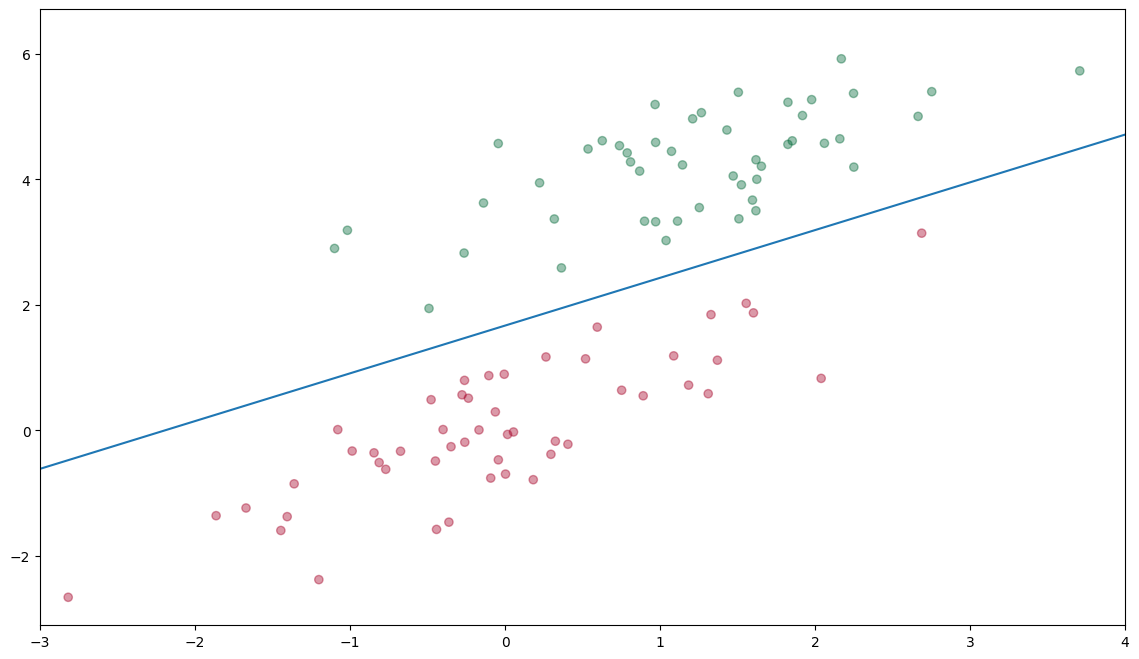

In [12]:
def myline(x):
    return line(x,weights[0],weights[1],weights[2])

plt.figure(figsize=(14,8))
plt.xlim([-3,4])
plt.scatter(dataset[:, 0], dataset[:, 1], c = labels, cmap="RdYlGn", alpha = .4)
plt.plot([-3,4],[myline(-3),myline(4)])

final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))
print('Accuracy: {0}'.format((preds == labels).sum().astype(float) / len(preds)))

# 2) Logistic regression on real dataset 

Let us use the fantastic notebooks from https://physics.bu.edu/~pankajm/MLnotebooks.html, a terrific book for ML newcomers especially if they come from physics. We will consider again our friend MNIST, remember the lecture on KNN? First a bit of history on this famous dataset:


... all info on MNIST

### SoftMax regression:
 Before we consider two possible labels for our data, you can easily guess that it is amenable to have more than one in this case. 

 Do not worry! We can easily generalize what we said before. 


We will use SoftMax regression, which can be thought of as a statistical model which assigns a probability that a given input image corresponds to any of the 10 handwritten digits. The model is a generalization of the logistic regression and reads:
$$
p(y_i=j|\vec{x}_i;\vec{w}) = \frac{e^{-\vec{w}_j^T \vec{x}}}{\sum_{k=0}^9 e^{-\vec{w}_k^T\vec{x} }},
$$
Where $p(y_i=j|\vec{x}_i;\vec{w})$ is the probability that input $\vec{x}_i$ is the $j$-th digit, $j\in[0,9]$.
The model also has 10 weight vectors $\vec{w}_j$ which we will train below. Finally, one can use this information for prediction by taking the value of $y_i$ for which this probability is maximized:
\begin{align}
y_{pred}=\arg\max_i p(y=i|\vec{x})
\end{align}

First thing to do is to import the dataset and preprocess the data:

In [13]:
#Before we start a little of clarification notes of SoftMax Regression that I made to help me undertsand. 
#Softmax regression is a generalization of logistic regression that we can use for multi-class classification. That is why we need a new probability function that can handle multiple classes. (as seen above)
#After calculating the probabilities for each class (in our example [0,9]) the second function assigns the input x_i to the class with the highest probability.

#now for the initial data handling


import time
from sklearn.datasets import fetch_openml # MNIST data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

print(__doc__)

# Turn down for faster convergence
train_size = 20000
test_size = 5000

### load MNIST data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

X = np.asarray(X)
y = np.asarray(y)

Automatically created module for IPython interactive environment


Let's plot an image to see how it looks like with plt.imshow.

'9'

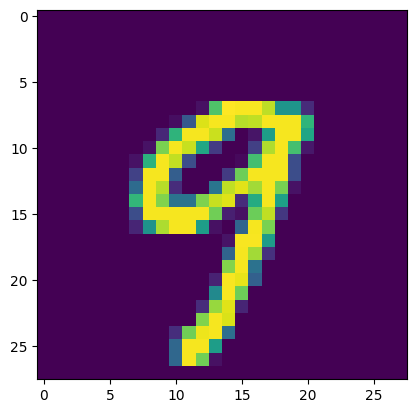

In [14]:
plt.imshow(X[45,:].reshape(28,28))
y[45]

We shuffle the data and we do the test-train splitting.

In [15]:
# shuffle data
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))             #This reshapes X into a 2D array, where each row is a sample and each column a feature.
# pick training and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=train_size,test_size=test_size)

We preproccess the data and use StandardScaler to have zero mean and unit variance. Pay attention that we do that only on the training set!

In [16]:
# scale data to have zero mean and unit variance [required by regressor]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

**Exercise** 
 1. You need to learn how to read a Python documentation. Search on the internet how to implement softmax regression.
 2. Fix the value of the regularization to be $10^{-5}$. Fit the data and compute two quantities: 
   - Sparsity of the weights (percentage of non-zero weights)
   - Score (i.e. accuracy)

In [18]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(multi_class='multinomial', penalty='l2', solver='sag', C=1e5) #logistic regression: multinomial is used for multi-class classification (softmax), sag is a solver that is faster for large datasets, C is the inverse of regularization, thats is why a - is missing.
clf.fit(X_train, y_train)  #fit/train the model

#sparcity as defineed above + score (on test data)!!!!
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)

#results
print("Sparsity: %.2f%%" % sparsity)
print("Accuracy: %.4f" % score)

# Copy the coefficient vector
coef = clf.coef_.copy()

c:\Users\nicol\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Sparsity: 11.48%
Accuracy: 0.7640


c:\Users\nicol\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Let us see how we can actually plot the weights against the pixels!!

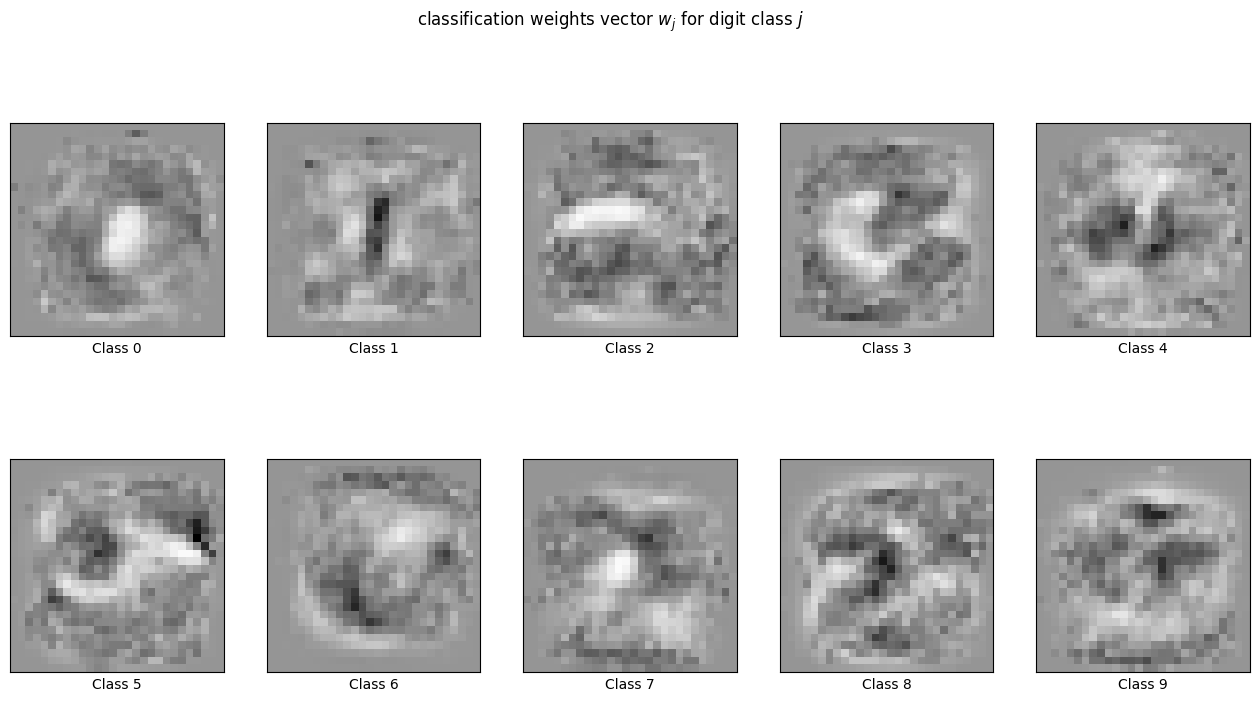

In [19]:
# plot weights vs the pixel position
plt.figure(figsize=(16, 8))
scale = np.abs(coef).max()
for i in range(10):
    l2_plot = plt.subplot(2, 5, i + 1)
    l2_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.Greys, vmin=-scale, vmax=scale)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    l2_plot.set_xlabel('Class %i' % i)
plt.suptitle('classification weights vector $w_j$ for digit class $j$')
plt.show()

# 3) SVM Classification on real dataset 

**Exercise**
 1. Repeat what you did for softmax regression for an Support Vector Machine (SVM) linear classifier.
 2. Go and search the Python doc for SVM classifier. Choose the linear one
 3. Fit the data using the default value of regularization and compare with an optimized value using CV.

In [6]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml # MNIST data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state


print(__doc__)

# Turn down for faster convergence
train_size = 20000
test_size = 5000

### load MNIST data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

X = np.asarray(X)
y = np.asarray(y)

# shuffle data
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))             #This reshapes X into a 2D array, where each row is a sample and each column a feature.
# pick training and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=train_size,test_size=test_size)

# scale data to have zero mean and unit variance [required by regressor]
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)
X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

#------------------new---------------------

SVM = LinearSVC(penalty='l1', dual=False, tol=1e-3, max_iter=500, C=0.01) #if loss not defined it defaults to HINGE
SVM.fit(X_train, y_train)
y_prediction = SVM.predict(X_test)
score = SVM.score(X_test, y_test)

Automatically created module for IPython interactive environment


In [7]:
print("Accuracy: %.4f" % score)

Accuracy: 0.7744


In [10]:
from sklearn.model_selection import GridSearchCV

C = [ {'C': [0.001,0.01,0.1]}] #I kept the number of C values low to keep the runtime low
SVM_CV = GridSearchCV(estimator = SVM,param_grid = C, scoring='accuracy', cv=3, n_jobs=-1)     

# fit the model
SVM_CV.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=LinearSVC(C=0.01, dual=False, max_iter=500, penalty='l1',
                                 tol=0.001),
             n_jobs=-1, param_grid=[{'C': [0.001, 0.01, 0.1]}],
             scoring='accuracy')

In [11]:
#results
print(f"Best C value: {SVM_CV.best_params_['C']}")
print(f"Best accuracy score: {SVM_CV.best_score_:.4f}")

Best C value: 0.1
Best accuracy score: 0.9126
